## Install Segyio

In [1]:
pip install segyio

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Importing Necessary Libraries

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
import pandas as pd
import segyio

## Loading Seismic File

In [10]:
# Name of the seismic file
#filename='Gandhar.sgy' # Enter the file name within the quotes
filename='Seismic_data.sgy'

In [11]:
f=segyio.open(filename,ignore_geometry=True)  


## Structure of a Seismic Seg Y file

In [5]:
from IPython.display import Image
from IPython.display import display

display(Image(url='https://subsurfwiki.org/images/thumb/4/4f/SEGY_file_byte_stream_structure.svg/1280px-SEGY_file_byte_stream_structure.svg.png',height=600,width=1000))

**Extractable Data from a Seg Y file**

1) **Textual File Header**

2) **Binary File Header**

3) **Trace Header for each trace**

4) **Trace data (Seismic traces)**

for more information refer to this 
<a href="https://library.seg.org/pb-assets/technical-standards/seg_y_rev1-1686080991247.pdf">Seg Y file structure</a>

## Textual File Header

In [6]:
from IPython.display import Image
from IPython.display import display

display(Image(url='https://data.lynxinfo.co.uk/helpfiles/images/TraceDmp/tracedmp_main.jpg',height=600,width=1000))

## Extracting Textual FIle Header information from file

Textual Headers are encoded, so we have to decode it for viewing it. 

Two types of encoding is possible :  1) **EBCDIC encoding**  2) **ASCII encoding**.

Segyio can decode **EBCDIC encoding**, but not **ASCII encoding**

## Extracting Textual File Header (EBCDIC encoding):

In [9]:
print(segyio.tools.wrap(f.text[0]))

C 1 CLIENT: OIL AND NATURAL GAS CORPORATION LIMITED    3D SURVEY
C 2 AREA:GANDHAR           SURVEY:ANK3D-BLK16          PROSPECT:GNDR-MRG
C 3 SPHEROID:EVEREST 75    PROJECTION:LMI IND 3A       CP1:80.000N  CP2:19.000N
C 4 FIRST LIVE             INLINE:   672               X-LINE:   318
C 4 LAST  LIVE             INLINE:  1893               X-LINE:  3088
C 6 PROSPECT CORNERS: GRID: BIN SIZE: XL20 x INL 40 M, AZIMUTH:AZX 0.11818786,
C 7 AZY 1.68898419 RADIANS, MERGE of SIG-286,337,346,347,350,355,360,364,369,
C 8 375,386,392,396,402,406,416
C 9 G4  X: 2022400.79   Y: 1282474.07   INLINE:  1893    XLINE:  3088
C10 ACQUISITION PARAMETERS
C11 RECORDING YEAR:        AGENCY:ONGC,BARODA          CREW:GP,BARODA
C12 SYSTEM:                REC FORMAT:                 LOW/HIGHCUT:
C13 NO OF CHANNELS:        FOLD:                       SOURCE:DYNAMITE
C14 SAMPLE INTERVAL: 2 MS  REC LENGTH: 7000 MS         REC START TIME:
C15 SHOT INTERVAL:         GROUP INTERVAL:             NEAR OFFSET:
C16 LAYOUT

## Extracting Textual File Header (ASCII Encoding):


In [6]:


a2e = [
    0,  1,  2,  3,  55, 45, 46, 47, 22, 5,  37, 11, 12, 13, 14, 15,
    16, 17, 18, 19, 60, 61, 50, 38, 24, 25, 63, 39, 28, 29, 30, 31,
    64, 79, 127,123,91, 108,80, 125,77, 93, 92, 78, 107,96, 75, 97,
    240,241,242,243,244,245,246,247,248,249,122,94, 76, 126,110,111,
    124,193,194,195,196,197,198,199,200,201,209,210,211,212,213,214,
    215,216,217,226,227,228,229,230,231,232,233,74, 224,90, 95, 109,
    121,129,130,131,132,133,134,135,136,137,145,146,147,148,149,150,
    151,152,153,162,163,164,165,166,167,168,169,192,106,208,161,7,
    32, 33, 34, 35, 36, 21, 6,  23, 40, 41, 42, 43, 44, 9,  10, 27,
    48, 49, 26, 51, 52, 53, 54, 8,  56, 57, 58, 59, 4,  20, 62, 225,
    65, 66, 67, 68, 69, 70, 71, 72, 73, 81, 82, 83, 84, 85, 86, 87,
    88, 89, 98, 99, 100,101,102,103,104,105,112,113,114,115,116,117,
    118,119,120,128,138,139,140,141,142,143,144,154,155,156,157,158,
    159,160,170,171,172,173,174,175,176,177,178,179,180,181,182,183,
    184,185,186,187,188,189,190,191,202,203,204,205,206,207,218,219,
    220,221,222,223,234,235,236,237,238,239,250,251,252,253,254,255
]

e2a = [
    0,  1,  2,  3,  156,9,  134,127,151,141,142, 11,12, 13, 14, 15,
    16, 17, 18, 19, 157,133,8,  135,24, 25, 146,143,28, 29, 30, 31,
    128,129,130,131,132,10, 23, 27, 136,137,138,139,140,5,  6,  7,
    144,145,22, 147,148,149,150,4,  152,153,154,155,20, 21, 158,26,
    32, 160,161,162,163,164,165,166,167,168,91, 46, 60, 40, 43, 33,
    38, 169,170,171,172,173,174,175,176,177,93, 36, 42, 41, 59, 94,
    45, 47, 178,179,180,181,182,183,184,185,124,44, 37, 95, 62, 63,
    186,187,188,189,190,191,192,193,194,96, 58, 35, 64, 39, 61, 34,
    195,97, 98, 99, 100,101,102,103,104,105,196,197,198,199,200,201,
    202,106,107,108,109,110,111,112,113,114,203,204,205,206,207,208,
    209,126,115,116,117,118,119,120,121,122,210,211,212,213,214,215,
    216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,
    123,65, 66, 67, 68, 69, 70, 71, 72, 73, 232,233,234,235,236,237,
    125,74, 75, 76, 77, 78, 79, 80, 81, 82, 238,239,240,241,242,243,
    92, 159,83, 84, 85, 86, 87, 88, 89, 90, 244,245,246,247,248,249,
    48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 250,251,252,253,254,255
]

h=f.text[0]
h = h.translate(bytearray(a2e)).decode('ascii')
print(h)

C01  Created by:  (Tue Apr 07 16:03:31 2009)                                    C02  F3 Demo                                                                    C03                                                                             C04                                                                             C05  Byte positions (in addition to REV. 1 standard positions):                 C06  X-coordinate: 73                                                           C07  Y-coordinate: 77                                                           C08  In-line:      9 (4-byte int)                                               C09  X-line:       21 (4-byte int)                                              C10                                                                             C11                                                                             C12  100/300 = (605835.5,6073556.5)                                             C13  100/1250 = (629576.25,6074220)     

## Binary File Header

In [9]:
#print(dict(f.bin))
s=dict(f.bin)
for x, y in s.items():
  print(x, y)

JobID 1
LineNumber 0
ReelNumber 0
Traces 0
AuxTraces 0
Interval 4000
IntervalOriginal 0
Samples 462
SamplesOriginal 0
Format 3
EnsembleFold 0
SortingCode 4
VerticalSum 0
SweepFrequencyStart 0
SweepFrequencyEnd 0
SweepLength 0
Sweep 0
SweepChannel 0
SweepTaperStart 0
SweepTaperEnd 0
Taper 0
CorrelatedTraces 0
BinaryGainRecovery 0
AmplitudeRecovery 0
MeasurementSystem 1
ImpulseSignalPolarity 0
VibratoryPolarity 0
ExtAuxTraces 0
ExtSamples 0
ExtSamplesOriginal 0
ExtEnsembleFold 0
SEGYRevision 1
SEGYRevisionMinor 0
TraceFlag 1
ExtendedHeaders 0


## Extracting basic data from Seg Y file

#### Total Number of Traces

In [12]:
n_traces = f.tracecount
print('Total number of traces present is : ',n_traces)

Total number of traces present is :  600515


#### Number of Samples

In [13]:
n_samples=len(f.samples)
print(n_samples)

462


#### Samples in ms

In [14]:
#Note the values are in ms
twt=f.samples
print(twt)

[   4.    8.   12.   16.   20.   24.   28.   32.   36.   40.   44.   48.
   52.   56.   60.   64.   68.   72.   76.   80.   84.   88.   92.   96.
  100.  104.  108.  112.  116.  120.  124.  128.  132.  136.  140.  144.
  148.  152.  156.  160.  164.  168.  172.  176.  180.  184.  188.  192.
  196.  200.  204.  208.  212.  216.  220.  224.  228.  232.  236.  240.
  244.  248.  252.  256.  260.  264.  268.  272.  276.  280.  284.  288.
  292.  296.  300.  304.  308.  312.  316.  320.  324.  328.  332.  336.
  340.  344.  348.  352.  356.  360.  364.  368.  372.  376.  380.  384.
  388.  392.  396.  400.  404.  408.  412.  416.  420.  424.  428.  432.
  436.  440.  444.  448.  452.  456.  460.  464.  468.  472.  476.  480.
  484.  488.  492.  496.  500.  504.  508.  512.  516.  520.  524.  528.
  532.  536.  540.  544.  548.  552.  556.  560.  564.  568.  572.  576.
  580.  584.  588.  592.  596.  600.  604.  608.  612.  616.  620.  624.
  628.  632.  636.  640.  644.  648.  652.  656.  6

#### Sampling Rate and Total time

In [65]:
print('Sampling Rate is : ',twt[1]-twt[0],' ms')
print('Total Time is : ',twt[-1],' ms')

Sampling Rate is :  4.0  ms
Total Time is :  1848.0  ms


## Extracting Trace data

In [15]:
data = f.trace.raw[:]


#### Viewing the shape of the data file

In [16]:
np.shape(data)

(600515, 462)

#### Plotting a single trace

Text(0, 0.5, 'Amplitude')

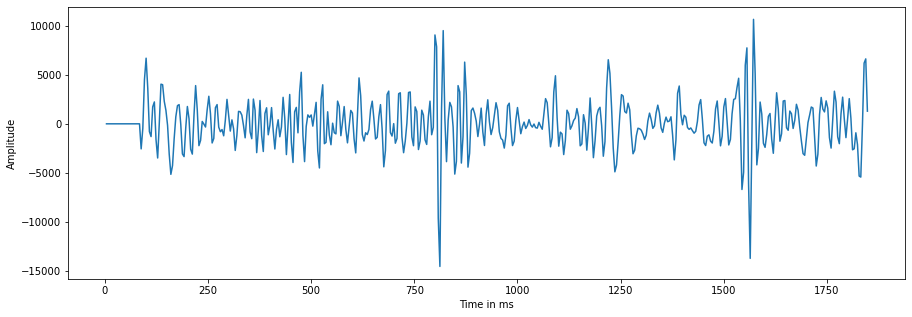

In [17]:
trace_number=1000

plt.figure(figsize=(15,5))
plt.plot(twt,data[trace_number])
plt.xlabel('Time in ms')
plt.ylabel('Amplitude')

## Extracting Trace Headers

#### Viewing the Trace header columns

In [18]:
Trace_header_cols = segyio.tracefield.keys

In [19]:
print(Trace_header_cols)

{'TRACE_SEQUENCE_LINE': 1, 'TRACE_SEQUENCE_FILE': 5, 'FieldRecord': 9, 'TraceNumber': 13, 'EnergySourcePoint': 17, 'CDP': 21, 'CDP_TRACE': 25, 'TraceIdentificationCode': 29, 'NSummedTraces': 31, 'NStackedTraces': 33, 'DataUse': 35, 'offset': 37, 'ReceiverGroupElevation': 41, 'SourceSurfaceElevation': 45, 'SourceDepth': 49, 'ReceiverDatumElevation': 53, 'SourceDatumElevation': 57, 'SourceWaterDepth': 61, 'GroupWaterDepth': 65, 'ElevationScalar': 69, 'SourceGroupScalar': 71, 'SourceX': 73, 'SourceY': 77, 'GroupX': 81, 'GroupY': 85, 'CoordinateUnits': 89, 'WeatheringVelocity': 91, 'SubWeatheringVelocity': 93, 'SourceUpholeTime': 95, 'GroupUpholeTime': 97, 'SourceStaticCorrection': 99, 'GroupStaticCorrection': 101, 'TotalStaticApplied': 103, 'LagTimeA': 105, 'LagTimeB': 107, 'DelayRecordingTime': 109, 'MuteTimeStart': 111, 'MuteTimeEND': 113, 'TRACE_SAMPLE_COUNT': 115, 'TRACE_SAMPLE_INTERVAL': 117, 'GainType': 119, 'InstrumentGainConstant': 121, 'InstrumentInitialGain': 123, 'Correlated': 

#### Creating a Blank dataframe to store the Trace Header information of all traces

In [20]:
Trace_Header_info = pd.DataFrame(index=range(1, n_traces + 1),columns=Trace_header_cols.keys())

In [80]:
Trace_Header_info

,TRACE_SEQUENCE_LINE,TRACE_SEQUENCE_FILE,FieldRecord,TraceNumber,EnergySourcePoint,CDP,CDP_TRACE,TraceIdentificationCode,NSummedTraces,NStackedTraces,...,TraceIdentifier,ScalarTraceHeader,SourceType,SourceEnergyDirectionMantissa,SourceEnergyDirectionExponent,SourceMeasurementMantissa,SourceMeasurementExponent,SourceMeasurementUnit,UnassignedInt1,UnassignedInt2
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
600512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
600513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
600514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
Trace_header_cols.items()

dict_items([('TRACE_SEQUENCE_LINE', 1), ('TRACE_SEQUENCE_FILE', 5), ('FieldRecord', 9), ('TraceNumber', 13), ('EnergySourcePoint', 17), ('CDP', 21), ('CDP_TRACE', 25), ('TraceIdentificationCode', 29), ('NSummedTraces', 31), ('NStackedTraces', 33), ('DataUse', 35), ('offset', 37), ('ReceiverGroupElevation', 41), ('SourceSurfaceElevation', 45), ('SourceDepth', 49), ('ReceiverDatumElevation', 53), ('SourceDatumElevation', 57), ('SourceWaterDepth', 61), ('GroupWaterDepth', 65), ('ElevationScalar', 69), ('SourceGroupScalar', 71), ('SourceX', 73), ('SourceY', 77), ('GroupX', 81), ('GroupY', 85), ('CoordinateUnits', 89), ('WeatheringVelocity', 91), ('SubWeatheringVelocity', 93), ('SourceUpholeTime', 95), ('GroupUpholeTime', 97), ('SourceStaticCorrection', 99), ('GroupStaticCorrection', 101), ('TotalStaticApplied', 103), ('LagTimeA', 105), ('LagTimeB', 107), ('DelayRecordingTime', 109), ('MuteTimeStart', 111), ('MuteTimeEND', 113), ('TRACE_SAMPLE_COUNT', 115), ('TRACE_SAMPLE_INTERVAL', 117), (

In [84]:
for i,j in Trace_header_cols.items():
    print(i,j)

TRACE_SEQUENCE_LINE 1
TRACE_SEQUENCE_FILE 5
FieldRecord 9
TraceNumber 13
EnergySourcePoint 17
CDP 21
CDP_TRACE 25
TraceIdentificationCode 29
NSummedTraces 31
NStackedTraces 33
DataUse 35
offset 37
ReceiverGroupElevation 41
SourceSurfaceElevation 45
SourceDepth 49
ReceiverDatumElevation 53
SourceDatumElevation 57
SourceWaterDepth 61
GroupWaterDepth 65
ElevationScalar 69
SourceGroupScalar 71
SourceX 73
SourceY 77
GroupX 81
GroupY 85
CoordinateUnits 89
WeatheringVelocity 91
SubWeatheringVelocity 93
SourceUpholeTime 95
GroupUpholeTime 97
SourceStaticCorrection 99
GroupStaticCorrection 101
TotalStaticApplied 103
LagTimeA 105
LagTimeB 107
DelayRecordingTime 109
MuteTimeStart 111
MuteTimeEND 113
TRACE_SAMPLE_COUNT 115
TRACE_SAMPLE_INTERVAL 117
GainType 119
InstrumentGainConstant 121
InstrumentInitialGain 123
Correlated 125
SweepFrequencyStart 127
SweepFrequencyEnd 129
SweepLength 131
SweepType 133
SweepTraceTaperLengthStart 135
SweepTraceTaperLengthEnd 137
TaperType 139
AliasFilterFrequency 1

#### Print all the inlines

In [22]:
f.attributes(73)[:]

array([6058355, 6058605, 6058855, ..., 6290726, 6290976, 6291225],
      dtype=int32)

## Filling up the Trace Header Information Dataframe 

In [23]:
for key, value in Trace_header_cols.items():
    Trace_Header_info[key] = f.attributes(value)[:]

In [24]:
pd.set_option('display.max_columns', 500)
Trace_Header_info

,TRACE_SEQUENCE_LINE,TRACE_SEQUENCE_FILE,FieldRecord,TraceNumber,EnergySourcePoint,CDP,CDP_TRACE,TraceIdentificationCode,NSummedTraces,NStackedTraces,DataUse,offset,ReceiverGroupElevation,SourceSurfaceElevation,SourceDepth,ReceiverDatumElevation,SourceDatumElevation,SourceWaterDepth,GroupWaterDepth,ElevationScalar,SourceGroupScalar,SourceX,SourceY,GroupX,GroupY,CoordinateUnits,WeatheringVelocity,SubWeatheringVelocity,SourceUpholeTime,GroupUpholeTime,SourceStaticCorrection,GroupStaticCorrection,TotalStaticApplied,LagTimeA,LagTimeB,DelayRecordingTime,MuteTimeStart,MuteTimeEND,TRACE_SAMPLE_COUNT,TRACE_SAMPLE_INTERVAL,GainType,InstrumentGainConstant,InstrumentInitialGain,Correlated,SweepFrequencyStart,SweepFrequencyEnd,SweepLength,SweepType,SweepTraceTaperLengthStart,SweepTraceTaperLengthEnd,TaperType,AliasFilterFrequency,AliasFilterSlope,NotchFilterFrequency,NotchFilterSlope,LowCutFrequency,HighCutFrequency,LowCutSlope,HighCutSlope,YearDataRecorded,DayOfYear,HourOfDay,MinuteOfHour,SecondOfMinute,TimeBaseCode,TraceWeightingFactor,GeophoneGroupNumberRoll1,GeophoneGroupNumberFirstTraceOrigField,GeophoneGroupNumberLastTraceOrigField,GapSize,OverTravel,CDP_X,CDP_Y,INLINE_3D,CROSSLINE_3D,ShotPoint,ShotPointScalar,TraceValueMeasurementUnit,TransductionConstantMantissa,TransductionConstantPower,TransductionUnit,TraceIdentifier,ScalarTraceHeader,SourceType,SourceEnergyDirectionMantissa,SourceEnergyDirectionExponent,SourceMeasurementMantissa,SourceMeasurementExponent,SourceMeasurementUnit,UnassignedInt1,UnassignedInt2
1,1,1,100,0,300,300,0,1,0,0,1,0,0,0,0,0,0,0,0,0,-10,6058355,60735564,0,0,1,0,0,0,0,0,0,0,-4,0,4,0,0,462,4000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6058355,60735564,100,300,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,2,100,0,301,301,0,1,0,0,1,0,0,0,0,0,0,0,0,0,-10,6058605,60735571,0,0,1,0,0,0,0,0,0,0,-4,0,4,0,0,462,4000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6058605,60735571,100,301,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,3,100,0,302,302,0,1,0,0,1,0,0,0,0,0,0,0,0,0,-10,6058855,60735578,0,0,1,0,0,0,0,0,0,0,-4,0,4,0,0,462,4000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6058855,60735578,100,302,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,4,100,0,303,303,0,1,0,0,1,0,0,0,0,0,0,0,0,0,-10,6059105,60735585,0,0,1,0,0,0,0,0,0,0,-4,0,4,0,0,462,4000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6059105,60735585,100,303,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,5,5,100,0,304,304,0,1,0,0,1,0,0,0,0,0,0,0,0,0,-10,6059355,60735592,0,0,1,0,0,0,0,0,0,0,-4,0,4,0,0,462,4000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6059355,60735592,100,304,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600511,573,600511,750,0,1246,1246,0,1,0,0,1,0,0,0,0,0,0,0,0,0,-10,6290226,60904604,0,0,1,0,0,0,0,0,0,0,-4,0,4,0,0,462,4000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6290226,60904604,750,1246,600511,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
600512,574,600512,750,0,1247,1247,0,1,0,0,1,0,0,0,0,0,0,0,0,0,-10,6290476,60904611,0,0,1,0,0,0,0,0,0,0,-4,0,4,0,0,462,4000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6290476,60904611,750,1247,600512,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
600513,575,600513,750,0,1248,1248,0,1,0,0,1,0,0,0,0,0,0,0,0,0,-10,6290726,60904618,0,0,1,0,0,0,0,0,0,0,-4,0,4,0,0,462,4000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6290726,60904618,750,1248,600513,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
600514,576,600514,750,0,1249,1249,0,1,0,0,1,0,0,0,0,0,0,0,0,0,-10,6290976,60904625,0,0,1,0,0,0,0,0,0,0,-4,0,4,0,0,462,4000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6290976,60904625,750,1249,600514

## Extracting Inlines and Xlines

In [25]:
INLINES=list(set(Trace_Header_info.INLINE_3D))
XLINES=list(set(Trace_Header_info.CROSSLINE_3D))

print('Inline Information')
print('Number of Inlines : ',len(INLINES))
print('Starting : ',INLINES[0],' Ending : ',INLINES[-1])

print('CrossLine Information')
print('Number of crosslines : ',len(XLINES))
print('Starting : ',XLINES[0],' Ending : ',XLINES[-1])

Inline Information
Number of Inlines :  651
Starting :  100  Ending :  750
CrossLine Information
Number of crosslines :  951
Starting :  300  Ending :  1250


## Viewing an INLINE

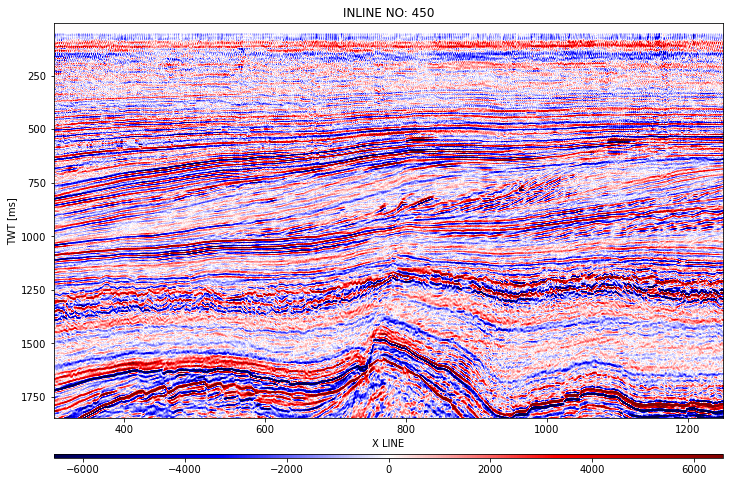

In [26]:
# Providing Inline number
INLINE_NUM=450

# Finding the trace numbers present in that inline
trace_nums=np.where(np.asarray(Trace_Header_info.INLINE_3D)==INLINE_NUM)[0]

# Finding the Crosslines present in that inline 
xlines=np.array(Trace_Header_info.CROSSLINE_3D[trace_nums[0]:trace_nums[-1]+1])

# Plotting
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1, 1, 1)

# Estimating starting and ending crosslines
s=xlines[0]
e=xlines[-1]

# clip_percentile for beter contrast taking 99 percentile of the values as max and min scale for the colorbar
clip_percentile = 99
vm = np.percentile(data, clip_percentile)

extent = [s,e , twt[-1], twt[0]]  # define extent
im=ax.imshow(data.T[:,trace_nums[0]:trace_nums[-1]], cmap="seismic", vmin=-vm, vmax=vm, aspect='auto',extent=extent)

ax.set_xlabel('X LINE')
ax.set_ylabel('TWT [ms]')
ax.set_title('INLINE NO: '+str(INLINE_NUM))
divider = make_axes_locatable(ax)
cax = divider.append_axes('bottom', size='1%', pad=0.5)

fig.colorbar(im, cax=cax, orientation='horizontal')
plt.show()

## Viewing a XLINE

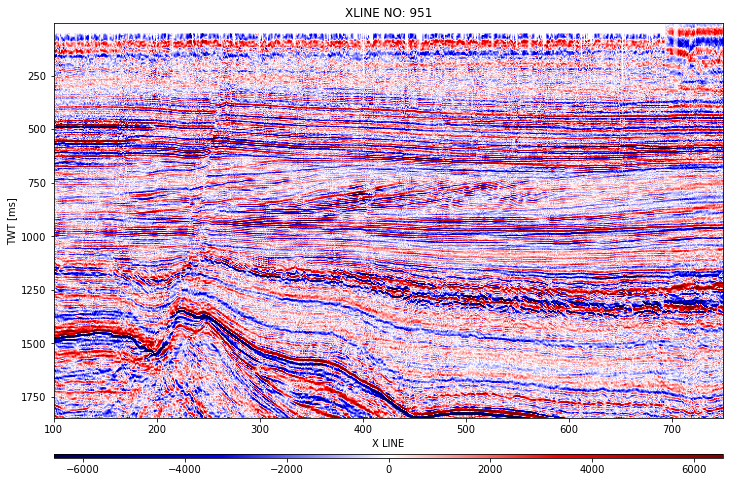

In [93]:
# Providing Inline number
XLINE_NUM=951

# Finding the trace numbers present in that inline
trace_nums=np.sort(np.where(np.asarray(Trace_Header_info.CROSSLINE_3D)==XLINE_NUM)[0])

# Finding the Crosslines present in that inline 
inlines=np.array(Trace_Header_info.INLINE_3D[trace_nums])



# Plotting
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1, 1, 1)

# Estimating starting and ending inlines
s=inlines[0]
e=inlines[-1]

# clip_percentile for beter contrast taking 99 percentile of the values as max and min scale for the colorbar
clip_percentile = 99
vm = np.percentile(data, clip_percentile)

extent = [s,e , twt[-1], twt[0]]  # define extent
im=ax.imshow(data.T[:,trace_nums], cmap="seismic", vmin=-vm, vmax=vm, aspect='auto',extent=extent)

ax.set_xlabel('X LINE')
ax.set_ylabel('TWT [ms]')
ax.set_title('XLINE NO: '+str(XLINE_NUM))
divider = make_axes_locatable(ax)
cax = divider.append_axes('bottom', size='1%', pad=0.5)

fig.colorbar(im, cax=cax, orientation='horizontal')
plt.show()


## Amplitude Spectra of a single trace

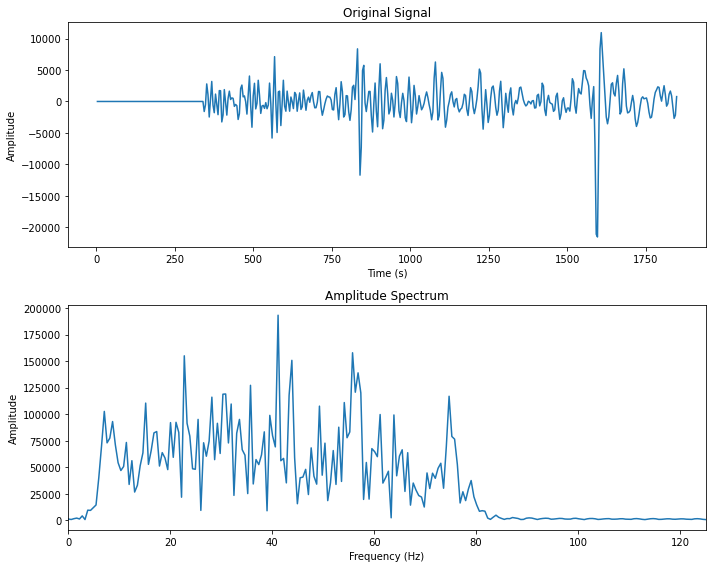

462 232


In [27]:
trace_num=1
fs=1000/4
# Compute the Fourier Transform
fft_result = np.fft.rfft(data[trace_num])
frequencies = np.fft.rfftfreq(len(data[trace_num]), 4/1000)  # Frequency values corresponding to each FFT component

# Compute the amplitude spectrum (absolute values of the FFT result)
amplitude_spectrum = np.abs(fft_result)
plt.figure(figsize=(10,8))
# Plot the original signal
plt.subplot(2, 1, 1)
plt.plot(twt, data[trace_num])
plt.title('Original Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Plot the amplitude spectrum
plt.subplot(2, 1, 2)
plt.plot(frequencies, amplitude_spectrum)
plt.title('Amplitude Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.xlim(0, fs/2)  # Show only positive frequencies (Nyquist limit)
plt.tight_layout()

plt.show()

print(len(data[trace_num]),len(frequencies))

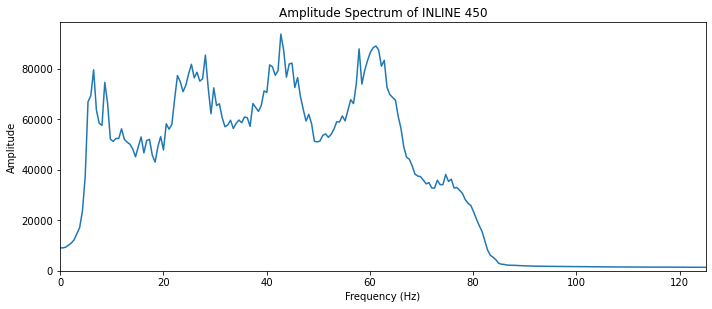

In [121]:
INLINE_NUM=450

# Finding the trace numbers present in that inline
trace_nums=np.where(np.asarray(Trace_Header_info.INLINE_3D)==INLINE_NUM)[0]

fs=1000/4

# Compute the Fourier Transform
fft_result = np.abs(np.fft.rfft(data[trace_nums]))
amplitude_spectra = np.mean(fft_result, axis = 0)

frequencies = np.fft.rfftfreq(len(data[trace_nums[0]]), 4/1000)  # Frequency values corresponding to each FFT component

# Compute the amplitude spectrum (absolute values of the FFT result)
#amplitude_spectrum = np.abs(fft_result)
plt.figure(figsize=(10,8))

# Plot the amplitude spectrum
plt.subplot(2, 1, 1)
plt.plot(frequencies, amplitude_spectra)
plt.title('Amplitude Spectrum of INLINE '+str(INLINE_NUM))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.xlim(0, fs/2)  # Show only positive frequencies (Nyquist limit)
plt.ylim(0)
plt.tight_layout()

#for filling the part
#plt.fill_between(frequencies, amplitude_spectra, 0,color = 'r')
plt.show()


## Assignment 7:


**Problem Statement:**

Create the same code to find the amplitude spectrum of a Cross line number and plot the amplitude spectrum